In [23]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [24]:
import sounddevice as sd
import numpy as np
import scipy.io.wavfile as wavfile

def record_audio(duration=10, fs=44100, channels=2, filename="recorded_audio.wav"):
    """
    Records audio from the default input device and saves it to a WAV file.

    Args:
        duration (int): Duration of recording in seconds.
        fs (int): Sampling frequency in Hz.
        channels (int): Number of audio channels (1 for mono, 2 for stereo).
        filename (str): Name of the file to save the recording to.
    """

    print(f"Recording for {duration} seconds...")
    try:
      recording = sd.rec(int(duration * fs), samplerate=fs, channels=channels)
      sd.wait() # Wait until recording is finished
      print("Recording finished.")

      wavfile.write(filename, fs, recording)
      print(f"Audio saved to: {filename}")
    except sd.PortAudioError as e:
      print(f"Error during recording: {e}")
      print("Make sure that you have the necessary audio drivers for your system and a working microphone setup.")
      return False
    except Exception as e:
      print(f"An unexpected error occurred: {e}")
      return False
    return True


if __name__ == "__main__":
    recording_duration = 10  # seconds
    sampling_rate = 44100  # Hz
    audio_channels = 2  # The audio will have 2 channels
    output_filename = "counting_to_ten.wav"  # Name of the output file

    record_audio(recording_duration, sampling_rate, audio_channels, output_filename)

Recording for 10 seconds...
Recording finished.
Audio saved to: counting_to_ten.wav


True

Current working directory: c:\Users\phate\OneDrive\Desktop\SIGNAL


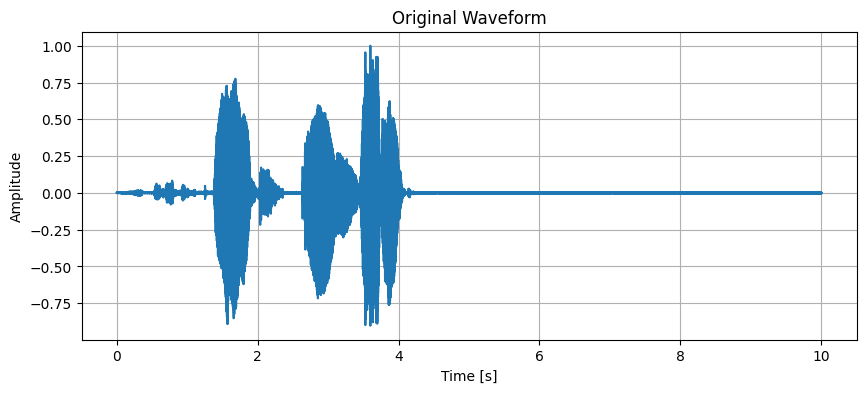

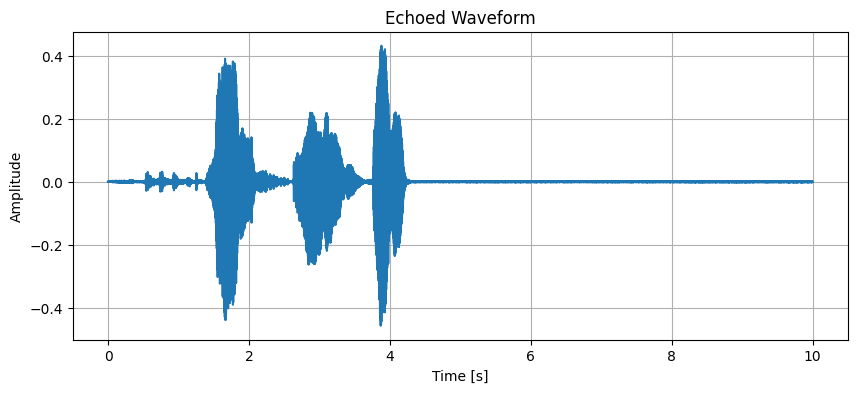

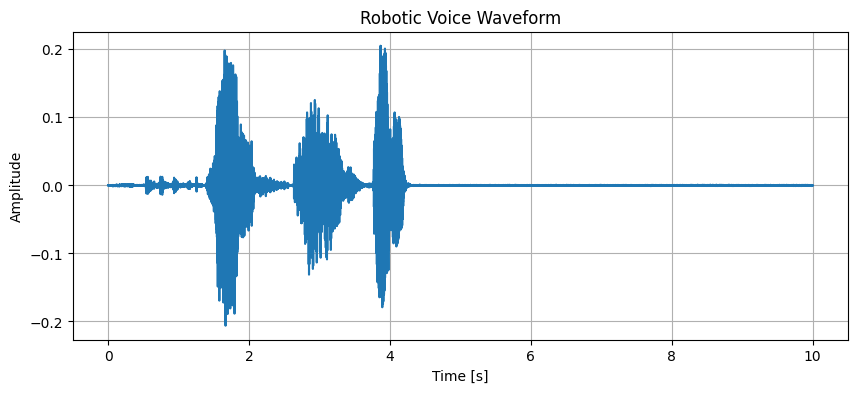

Processing complete. Files saved as 'effect_echo.wav' and 'effect_robot.wav'.


: 

In [25]:
import numpy as np
import scipy.io.wavfile as wavfile
import scipy.signal as signal
import matplotlib.pyplot as plt
import os

def apply_bandpass_filter(data, fs, lowcut=500, highcut=2000):
    """
    Applies a band-pass filter to the audio data.

    Args:
        data (numpy array): The audio data.
        fs (int): Sampling frequency in Hz.
        lowcut (int): Lower cutoff frequency in Hz.
        highcut (int): Upper cutoff frequency in Hz.

    Returns:
        numpy array: Filtered audio data.
    """
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = signal.butter(4, [low, high], btype='band')
    filtered_data = signal.lfilter(b, a, data)
    return filtered_data

def apply_echo(data, fs, delay=0.2, attenuation=0.5):
    """
    Applies an echo effect to the audio data.

    Args:
        data (numpy array): The audio data.
        fs (int): Sampling frequency in Hz.
        delay (float): Delay time in seconds.
        attenuation (float): Attenuation factor for the echo.

    Returns:
        numpy array: Audio data with echo effect.
    """
    delay_samples = int(delay * fs)
    echoed_data = np.zeros_like(data)
    echoed_data[:delay_samples] = data[:delay_samples]
    echoed_data[delay_samples:] = data[delay_samples:] + attenuation * data[:-delay_samples]
    return echoed_data

def apply_amplitude_modulation(data, fs, mod_freq=200):
    """
    Applies amplitude modulation to the audio data to create a robotic voice effect.

    Args:
        data (numpy array): The audio data.
        fs (int): Sampling frequency in Hz.
        mod_freq (int): Modulation frequency in Hz.

    Returns:
        numpy array: Audio data with amplitude modulation.
    """
    t = np.arange(len(data)) / fs
    carrier = 0.5 * np.sin(2 * np.pi * mod_freq * t)
    modulated_data = data * carrier
    return modulated_data

def plot_waveform(data, fs, title):
    """
    Plots the waveform of the audio data.

    Args:
        data (numpy array): The audio data.
        fs (int): Sampling frequency in Hz.
        title (str): Title of the plot.
    """
    time = np.arange(len(data)) / fs
    plt.figure(figsize=(10, 4))
    plt.plot(time, data)
    plt.title(title)
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.show()

def main(input_file="input.wav"):
    print(f"Current working directory: {os.getcwd()}")

    # Load the input audio file
    try:
        fs, data = wavfile.read(input_file)
    except FileNotFoundError:
        print(f"Error: File '{input_file}' not found. Please provide a valid audio file.")
        return

    # If the audio is stereo, use only the first channel
    if len(data.shape) > 1:
        data = data[:, 0]

    # Normalize the audio data to the range [-1.0, 1.0]
    data = data.astype(np.float32) / np.max(np.abs(data))

    # Plot the original waveform
    plot_waveform(data, fs, "Original Waveform")

    # Apply band-pass filter
    filtered_data = apply_bandpass_filter(data, fs)

    # Apply echo effect
    echoed_data = apply_echo(filtered_data, fs)

    # Plot the echoed waveform
    plot_waveform(echoed_data, fs, "Echoed Waveform")

    # Apply amplitude modulation for robotic voice effect
    robotic_data = apply_amplitude_modulation(echoed_data, fs)

    # Plot the robotic waveform
    plot_waveform(robotic_data, fs, "Robotic Voice Waveform")

    # Normalize the output data to the range [-32768, 32767] for int16 WAV format
    echoed_data = np.int16(echoed_data / np.max(np.abs(echoed_data)) * 32767)
    robotic_data = np.int16(robotic_data / np.max(np.abs(robotic_data)) * 32767)

    # Save the processed audio
    wavfile.write("effect_echo.wav", fs, echoed_data)
    wavfile.write("effect_robot.wav", fs, robotic_data)

    print("Processing complete. Files saved as 'effect_echo.wav' and 'effect_robot.wav'.")

if __name__ == "__main__":
    # Replace "input.wav" with the path to your audio file
    main(input_file='C:/Users/phate/OneDrive/Desktop/SIGNAL/counting_to_ten.wav')